In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-new-dataset/Iris.csv


In [10]:
df = pd.read_csv('/kaggle/input/iris-new-dataset/Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df = df.iloc[:,1:]

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df['Species'] = encoder.fit_transform(df['Species'])

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalWidthCm','Species']]

In [19]:
df.head()

,SepalWidthCm,PetalWidthCm,Species
50,3.2,1.4,1
51,3.2,1.5,1
52,3.1,1.5,1
53,2.3,1.3,1
54,2.8,1.5,1


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

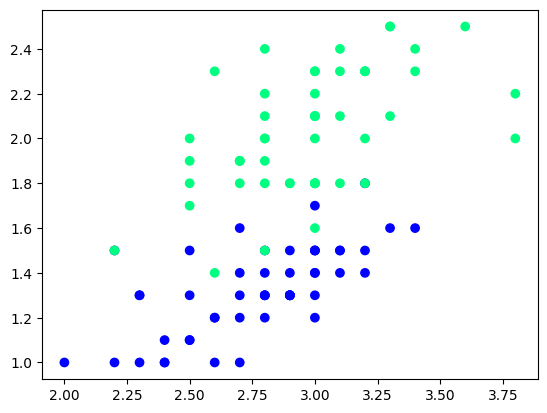

In [21]:
plt.scatter(df['SepalWidthCm'], df['PetalWidthCm'], c = df['Species'], cmap = 'winter')

In [22]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [23]:
df_train

,SepalWidthCm,PetalWidthCm,Species
113,2.5,2.0,2
63,2.9,1.4,1
139,3.1,2.1,2
142,2.7,1.9,2
103,2.9,1.8,2
140,3.1,2.4,2
129,3.0,1.6,2
101,2.7,1.9,2
114,2.8,2.4,2
104,3.0,2.2,2


In [24]:
df_val

,SepalWidthCm,PetalWidthCm,Species
51,3.2,1.5,1
81,2.4,1.0,1
92,2.6,1.2,1
109,3.6,2.5,2
96,2.9,1.3,1


In [25]:
df_test

,SepalWidthCm,PetalWidthCm,Species
84,3.0,1.5,1
130,2.8,1.9,2
56,3.3,1.6,1
93,2.3,1.0,1
80,2.4,1.1,1


In [26]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [27]:
X_test

array([[3.2, 1.5],
       [2.4, 1. ],
       [2.6, 1.2],
       [3.6, 2.5],
       [2.9, 1.3]])

In [28]:
y_test

array([1, 1, 1, 2, 1])

# Case 1 - Bagging

In [29]:
# Data for Tree 1
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalWidthCm,Species
63,2.9,1.4,1
101,2.7,1.9,2
139,3.1,2.1,2
63,2.9,1.4,1
139,3.1,2.1,2
104,3.0,2.2,2
114,2.8,2.4,2
103,2.9,1.8,2


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [31]:
dt_bag1 = DecisionTreeClassifier()

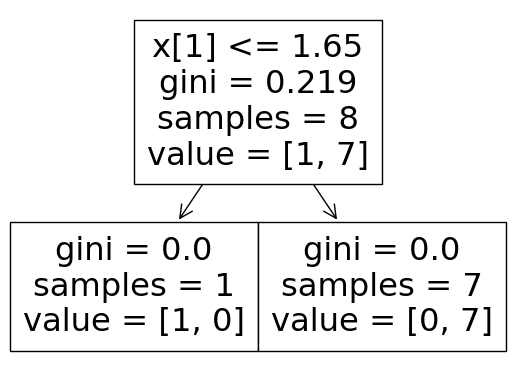

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


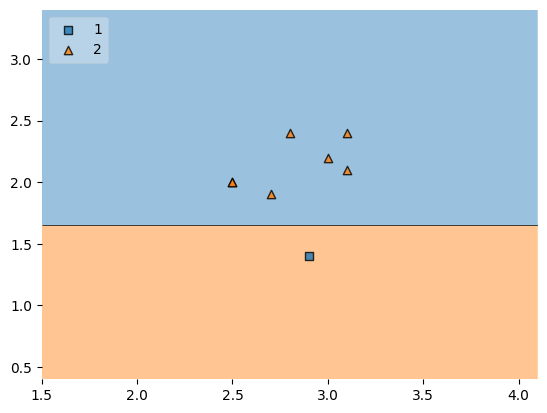

In [38]:
evaluate(dt_bag1,X,y)

In [33]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalWidthCm,Species
101,2.7,1.9,2
140,3.1,2.4,2
63,2.9,1.4,1
142,2.7,1.9,2
129,3.0,1.6,2
139,3.1,2.1,2
63,2.9,1.4,1
103,2.9,1.8,2


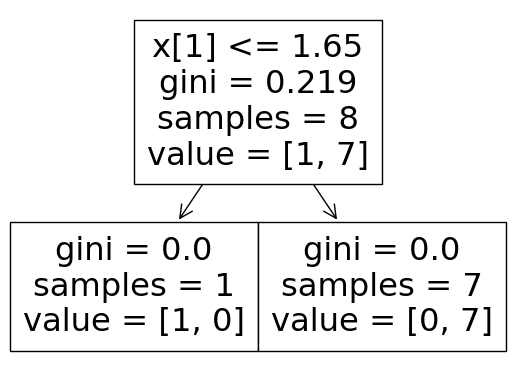

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


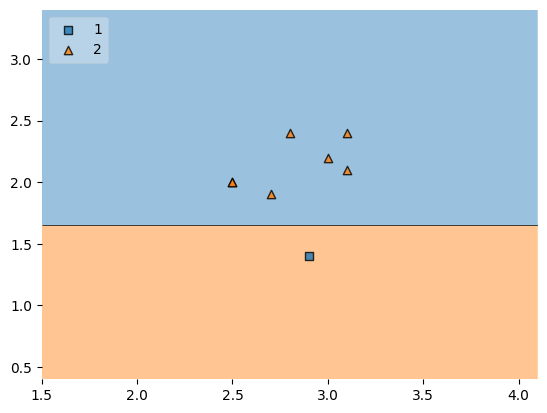

In [39]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [35]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalWidthCm,Species
114,2.8,2.4,2
101,2.7,1.9,2
113,2.5,2.0,2
139,3.1,2.1,2
140,3.1,2.4,2
104,3.0,2.2,2
63,2.9,1.4,1
113,2.5,2.0,2


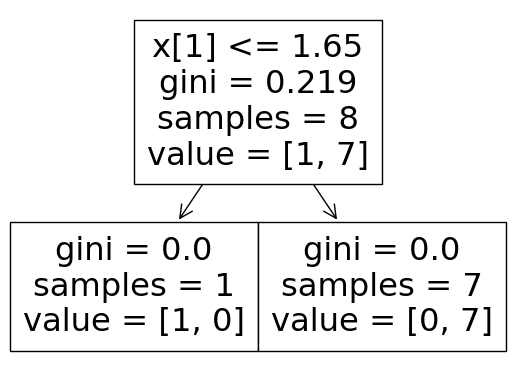

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


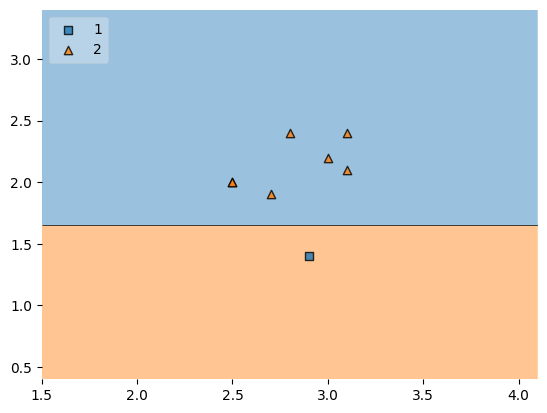

In [40]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [37]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Predict

In [41]:
df_test

,SepalWidthCm,PetalWidthCm,Species
84,3.0,1.5,1
130,2.8,1.9,2
56,3.3,1.6,1
93,2.3,1.0,1
80,2.4,1.1,1


In [43]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,1.9]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,1.9]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,1.9]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [44]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalWidthCm,Species
113,2.5,2.0,2
63,2.9,1.4,1
139,3.1,2.1,2
142,2.7,1.9,2
103,2.9,1.8,2
140,3.1,2.4,2
129,3.0,1.6,2
101,2.7,1.9,2
114,2.8,2.4,2
104,3.0,2.2,2


In [45]:
df_train.sample(8)

,SepalWidthCm,PetalWidthCm,Species
129,3.0,1.6,2
63,2.9,1.4,1
142,2.7,1.9,2
140,3.1,2.4,2
101,2.7,1.9,2
103,2.9,1.8,2
139,3.1,2.1,2
113,2.5,2.0,2


# Random Subspaces

In [48]:
df1 = pd.read_csv('/kaggle/input/iris-new-dataset/Iris.csv')
df1 = df1.sample(10)

In [49]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
129,130,7.2,3.0,5.8,1.6,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
124,125,6.7,3.3,5.7,2.1,Iris-virginica


In [50]:
df1.sample(2,replace=True,axis=1)

,Species,SepalWidthCm
129,Iris-virginica,3.0
69,Iris-versicolor,2.5
135,Iris-virginica,3.0
19,Iris-setosa,3.8
31,Iris-setosa,3.4
3,Iris-setosa,3.1
44,Iris-setosa,3.8
82,Iris-versicolor,2.7
70,Iris-versicolor,3.2
124,Iris-virginica,3.3


# Random Patches

In [51]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
129,130,7.2,3.0,5.8,1.6,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
124,125,6.7,3.3,5.7,2.1,Iris-virginica


In [52]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,SepalLengthCm
124,125,6.7
44,45,5.1
135,136,7.7
69,70,5.6
69,70,5.6
82,83,5.8
70,71,5.9
3,4,4.6
